我們先載入本次作業所需套件，pandas和numpy套件利於運算，載入sklearn.cluster的KMeans能幫助實作Kmeans分群法，matplotlib和seaborn利於繪圖

In [112]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

## Question2

將JWHT,page414第三題資料寫入df，六個觀察值並有X1和X2兩特徵

In [113]:
data = {'X1':[1, 1, 0, 5, 6, 4],
        'X2':[4, 3, 4, 1, 2, 0]}
df = pd.DataFrame(data)

In [114]:
print(df)

   X1  X2
0   1   4
1   1   3
2   0   4
3   5   1
4   6   2
5   4   0


(a)使用matplotlib.pyplot視覺化將六個觀察值於X1,X2特徵下的散佈圖繪製出來，得知各點相對位置

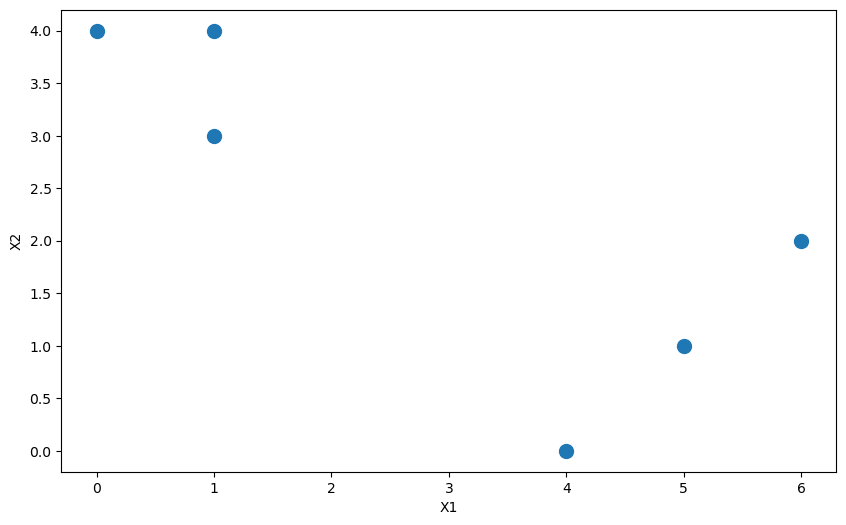

In [115]:
plt.figure(figsize = (10, 6))
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df['X1'], df['X2'], s=100)
plt.show()

(b)使用numpy套件的random功能，生成6位隨機0或1的list當作6個觀察值分類的依據(題目指定k=2，分為兩群)，在本次的隨機安排群，下表可知label(0&3)也就是第(1和4)個觀察值被分為group0(第0組)，其餘分為group1(第一組)

In [116]:
np.random.seed(0)
df['group'] = np.random.randint(2, size=6) 
print(df)

   X1  X2  group
0   1   4      0
1   1   3      1
2   0   4      1
3   5   1      0
4   6   2      1
5   4   0      1


(c)我們指定兩個list分別為group_zero和group_one，使用迴圈分別儲存第0組和第1組中觀察值的X1和X2數值，而後使用numpy的mean函數計算第0組和第1組的質心，我們分別以group_zero_cen和group_one_cen以np.array形式表示其質心分別之X1,X2數值，得知兩群質心位置

In [117]:
def position(df):
    group_zero = []
    group_one = []
    for i in range(len(df)):
        if df["group"][i] == 0:
            group_zero.append(df.iloc[i:i+1,0:2])
        else:
            group_one.append(df.iloc[i:i+1,0:2])
    group_zero_cen = np.mean(group_zero, axis=0)
    group_one_cen = np.mean(group_one, axis=0)
    print(group_zero_cen)
    print("第0組的質心座標(X1,X2) =",'(',group_zero_cen,')')
    print(group_one_cen)
    print("第1組的質心座標(X1,X2) =",'(',group_one_cen,')')
    return group_zero_cen, group_one_cen

In [118]:
center = position(df)

[[3.  2.5]]
第0組的質心座標(X1,X2) = ( [[3.  2.5]] )
[[2.75 2.25]]
第1組的質心座標(X1,X2) = ( [[2.75 2.25]] )


準備第二次分群，我們將各觀察點與目前兩組質心位置以Euclidean distance得到較短距離的即分為該組

(d)我們使用numpy的linalg.norm功能，計算各觀察點到兩群質心的歐幾里得距離，得到新的分組資料

In [119]:
def distance(df):
    for i in range(len(df)):
        if np.linalg.norm(df.iloc[i:i+1,0:2]-center[0]) > np.linalg.norm(df.iloc[i:i+1,0:2]-center[1]):
            df["group"][i] = 1
        else:
            df["group"][i] = 0

In [120]:
distance(df)

C:\Users\user\AppData\Local\Temp\ipykernel_15260\3181542921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["group"][i] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_15260\3181542921.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["group"][i] = 0


In [121]:
df["group"].tolist()

[1, 1, 1, 0, 0, 1]

重新計算儲存兩組其質心分別之X1,X2數值

In [122]:
center = position(df)

[[5.5 1.5]]
第0組的質心座標(X1,X2) = ( [[5.5 1.5]] )
[[1.5  2.75]]
第1組的質心座標(X1,X2) = ( [[1.5  2.75]] )


(e)本題目標為重複(c)和(d)過程，因此我們設定while迴圈，條件設定當我下次分群情況與上次一模一樣時，表示我與該組質心距離仍然為最近，已經不會有質心重新設定後分組狀況改變發生，則我這次的分群結果就是最後的分群結果

In [123]:
past_group = [0,1,1,0,1,1]
n = 2
while (past_group != df["group"].tolist()) :
        past_group = df["group"].tolist()
        n += 1
        print("這是第",n,"次嘗試")
        distance(df)
        print("第",n,"次分組情況:")
        print(df["group"])
        center = position(df)
        
print("一共測試了",n,"次，第",n-1,"次分類即為最終分組結果")       

這是第 3 次嘗試
第 3 次分組情況:
0    1
1    1
2    1
3    0
4    0
5    0
Name: group, dtype: int32
[[5. 1.]]
第0組的質心座標(X1,X2) = ( [[5. 1.]] )
[[0.66666667 3.66666667]]
第1組的質心座標(X1,X2) = ( [[0.66666667 3.66666667]] )
這是第 4 次嘗試
第 4 次分組情況:
0    1
1    1
2    1
3    0
4    0
5    0
Name: group, dtype: int32
[[5. 1.]]
第0組的質心座標(X1,X2) = ( [[5. 1.]] )
[[0.66666667 3.66666667]]
第1組的質心座標(X1,X2) = ( [[0.66666667 3.66666667]] )
一共測試了 4 次，第 3 次分類即為最終分組結果


C:\Users\user\AppData\Local\Temp\ipykernel_15260\3181542921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["group"][i] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_15260\3181542921.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["group"][i] = 0


(f)最後得知我本次分類最後結果為，觀察值1-3分為第一組，4-6為第二組，我們以散佈圖分別以黃色與藍色表示組1和組0代表之觀察點，組0的質心以白色Y標示，組1的質心以綠色Y表示，我們得到了為所有觀察值於K=2時最終分組結果的散佈圖

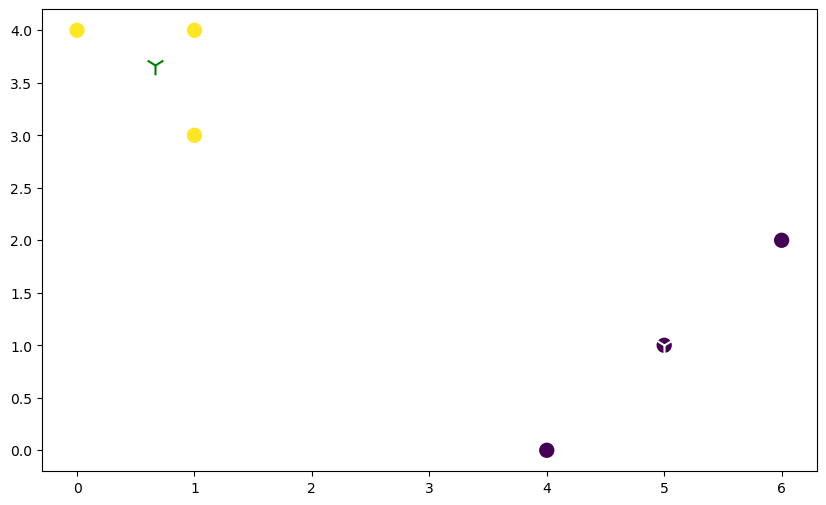

In [124]:
plt.figure(figsize = (10, 6))
plt.scatter(df["X1"],df["X2"], s=100, c=df["group"])
plt.scatter(0.66666667, 3.66666667, s=200, c='g', marker="1")
plt.scatter(5, 1, s=200, c='w', marker="1")
plt.show()

## Question3

匯入本題所需種子資料，並了解資料組成

In [125]:
seed_data = pd.read_csv(r"C:\Users\user\Desktop\seeds_dataset.csv")
seed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   varieties                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [126]:
seed_data

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [127]:
seed_data.shape

(210, 8)

In [128]:
seed_data.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,varieties
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [129]:
seed_data.isnull().values.any()

False

了解資料屬性個數，順便練習EDA

In [130]:
seed_data.nunique()

area                       193
perimeter                  170
compactness                186
length of kernel           188
width of kernel            184
asymmetry coefficient      207
length of kernel groove    148
varieties                    3
dtype: int64

繪製該資料各屬性的直方圖

array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'perimeter'}>,
        <AxesSubplot:title={'center':'compactness'}>],
       [<AxesSubplot:title={'center':'length of kernel'}>,
        <AxesSubplot:title={'center':'width of kernel'}>,
        <AxesSubplot:title={'center':'asymmetry coefficient'}>],
       [<AxesSubplot:title={'center':'length of kernel groove'}>,
        <AxesSubplot:title={'center':'varieties'}>, <AxesSubplot:>]],
      dtype=object)

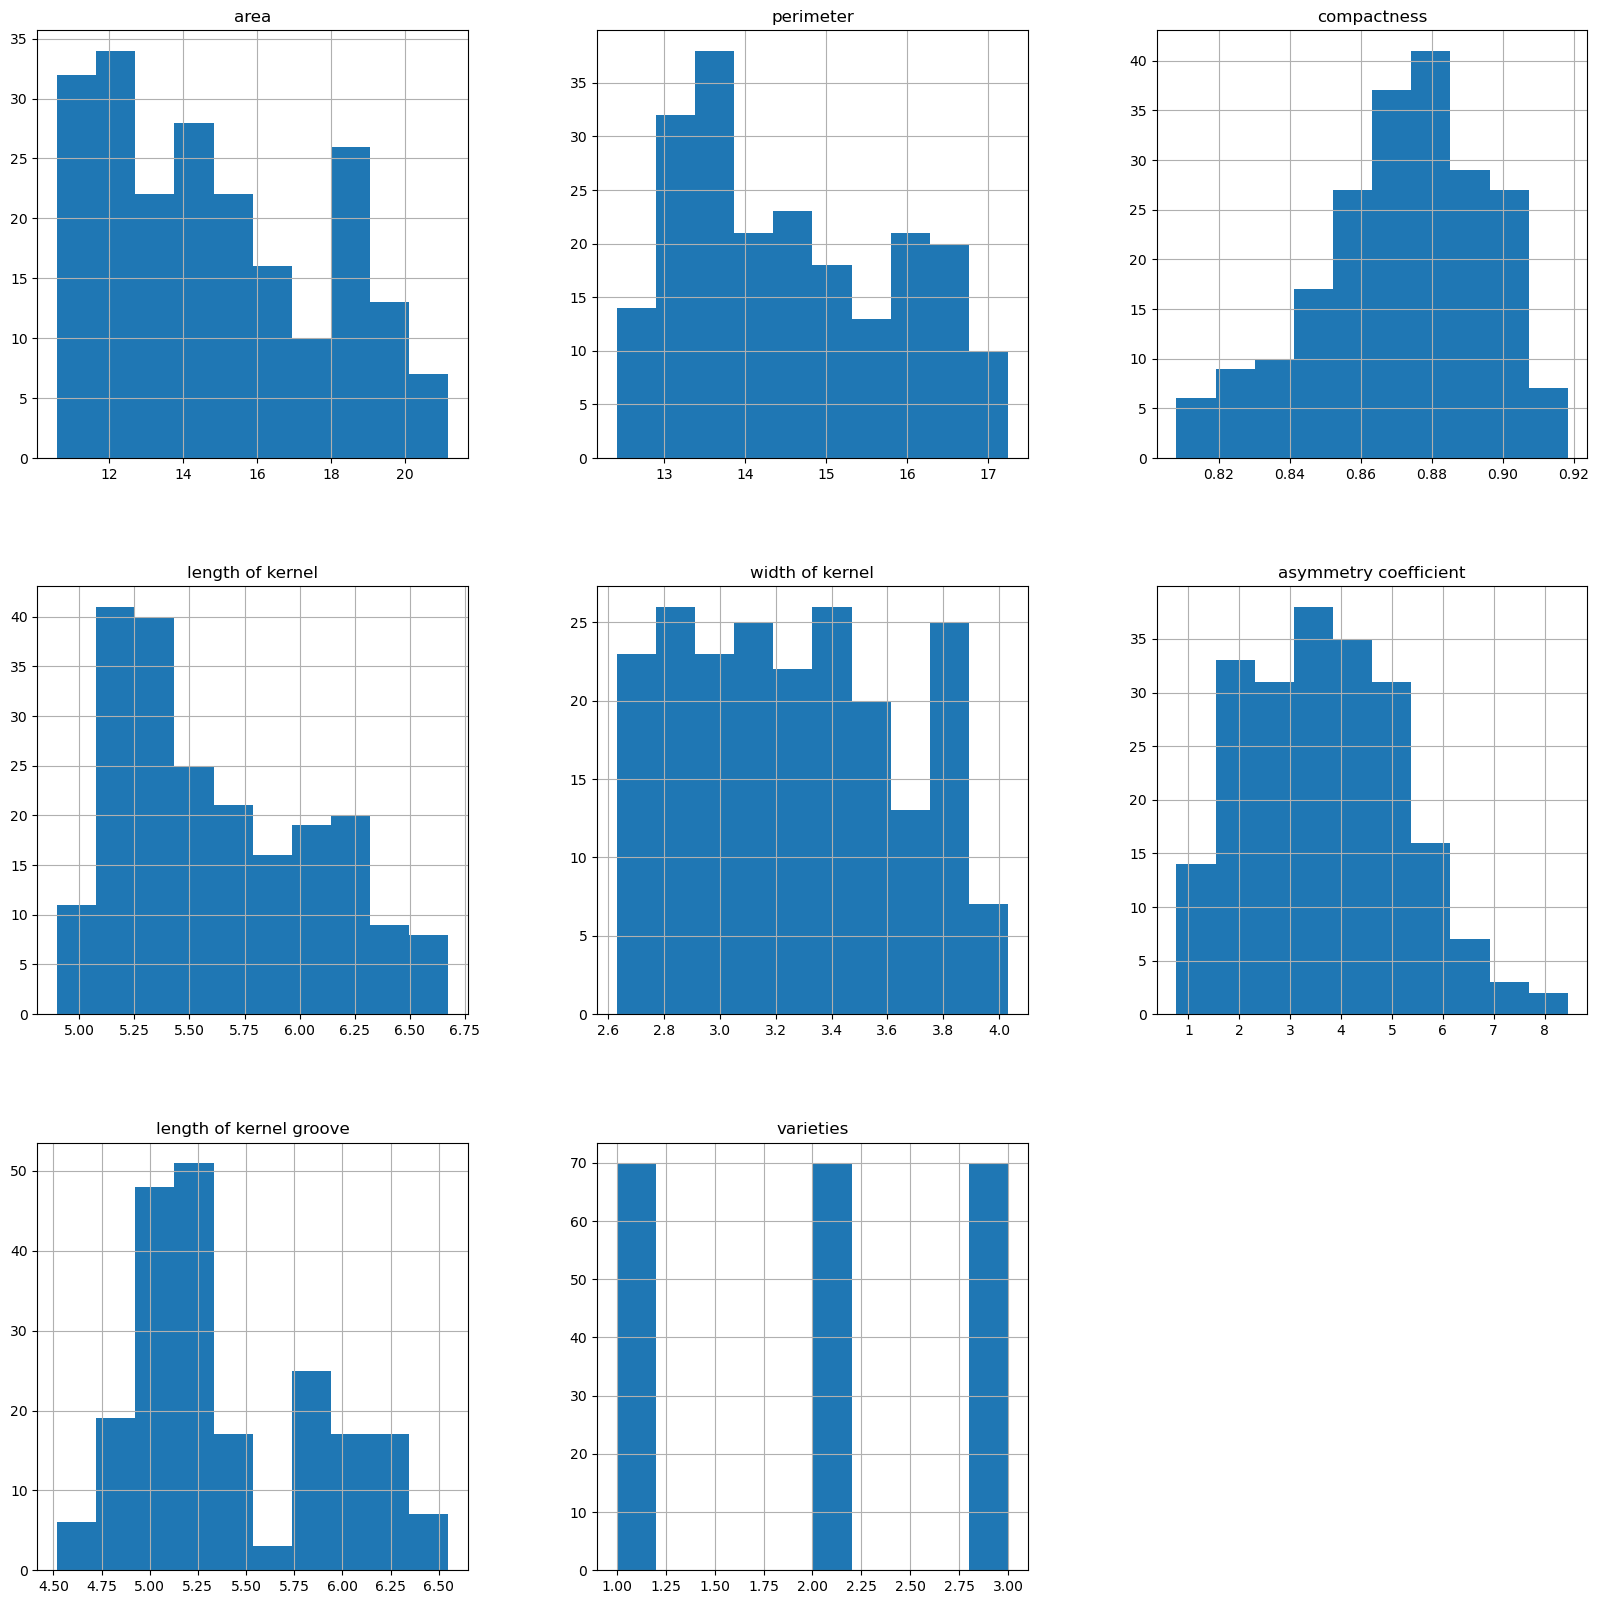

In [131]:
seed_data.hist(figsize=(20,20))

使用seaborn套件繪製各屬性之間的相關性散佈圖

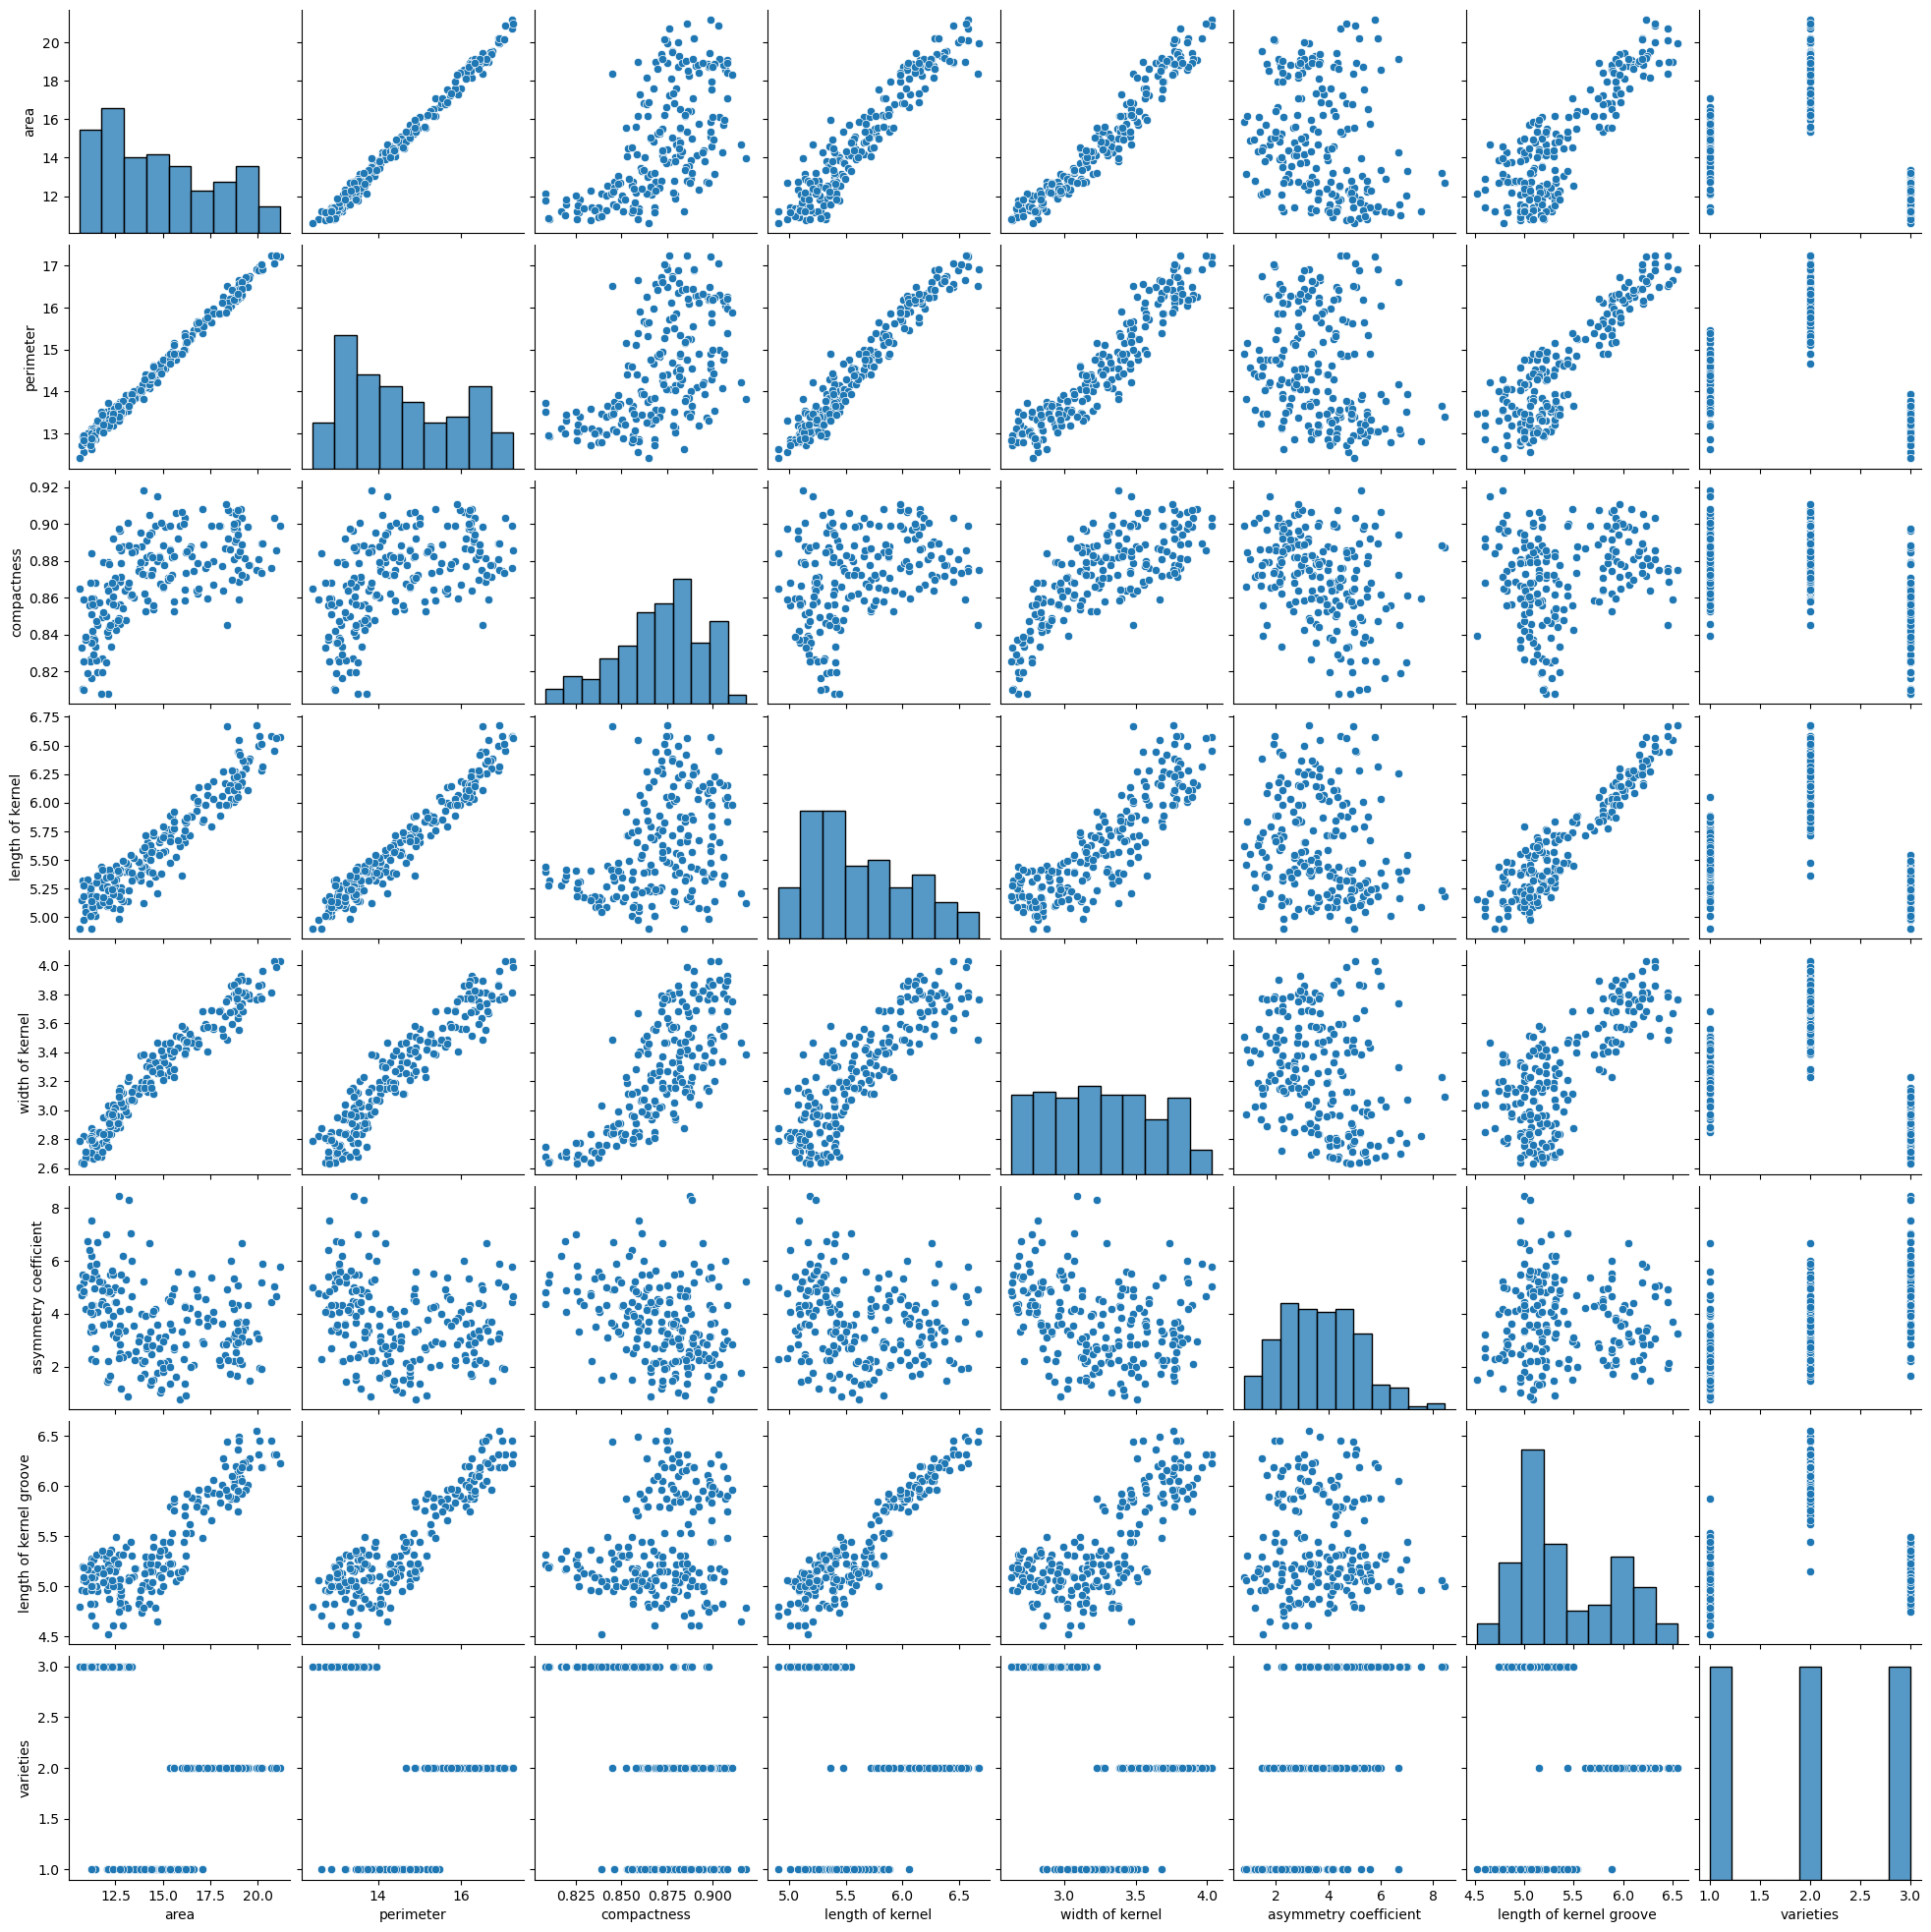

In [132]:
sns.pairplot(seed_data)
plt.show()

運用matplotlib和seaborn繪製能表示各屬性之間相關係數之熱力圖

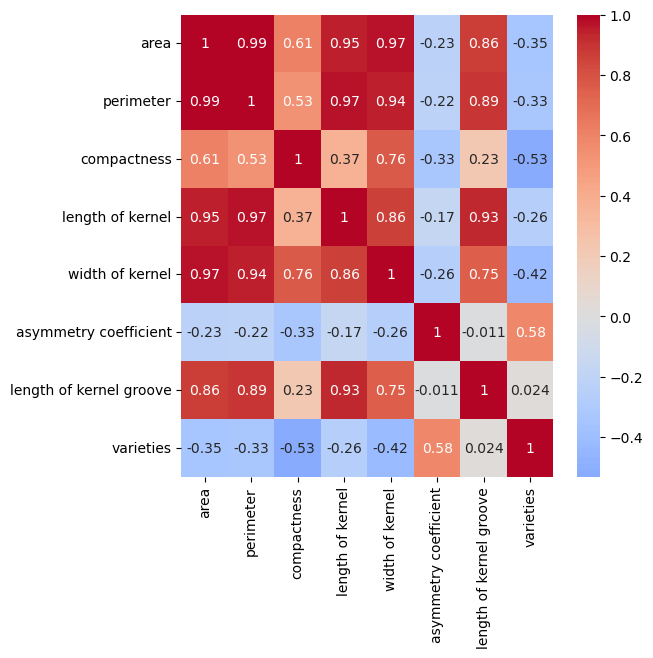

In [133]:
plt.figure(figsize=(6,6))
sns.heatmap(seed_data.corr(), annot = True, center=0.0, cmap='coolwarm');
plt.savefig('heatmap.png')
plt.show()

在後面視覺化上的方便，我們以asymmetry coefficient和length of kernel groove兩屬性進行分群

In [134]:
seed_data = seed_data.drop(labels = ['area', 'perimeter', 'compactness', 'length of kernel', 
                                     'width of kernel', 'varieties'],axis = 1)

轉換為array形式

In [135]:
data_np = seed_data.values
type(data_np)

numpy.ndarray

In [136]:
data_np

array([[2.221 , 5.22  ],
       [1.018 , 4.956 ],
       [2.699 , 4.825 ],
       [2.259 , 4.805 ],
       [1.355 , 5.175 ],
       [2.462 , 4.956 ],
       [3.586 , 5.219 ],
       [2.7   , 5.    ],
       [2.04  , 5.877 ],
       [1.969 , 5.533 ],
       [4.543 , 5.314 ],
       [1.717 , 5.001 ],
       [3.986 , 4.738 ],
       [3.136 , 4.872 ],
       [2.932 , 4.825 ],
       [4.185 , 4.781 ],
       [5.234 , 4.781 ],
       [1.599 , 5.046 ],
       [1.767 , 4.649 ],
       [4.102 , 4.914 ],
       [3.072 , 5.176 ],
       [2.688 , 5.219 ],
       [0.7651, 5.091 ],
       [1.415 , 4.961 ],
       [1.791 , 5.001 ],
       [0.903 , 5.307 ],
       [3.373 , 4.825 ],
       [2.504 , 4.869 ],
       [2.754 , 5.038 ],
       [3.531 , 5.097 ],
       [0.8551, 5.056 ],
       [3.412 , 5.228 ],
       [3.92  , 5.299 ],
       [2.124 , 5.012 ],
       [2.129 , 5.36  ],
       [2.27  , 5.443 ],
       [2.823 , 5.527 ],
       [2.956 , 5.484 ],
       [3.112 , 5.309 ],
       [6.685 , 5.001 ],


我們以衡量不同分群數量下SSE的數值，在k=3時以前每次增加群數都能大幅的下降SSE，k=3之後SSE並沒有明顯下降，為避免過度分群，使用SSE判斷下我們決定分為三群來進行k-mean分群法

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

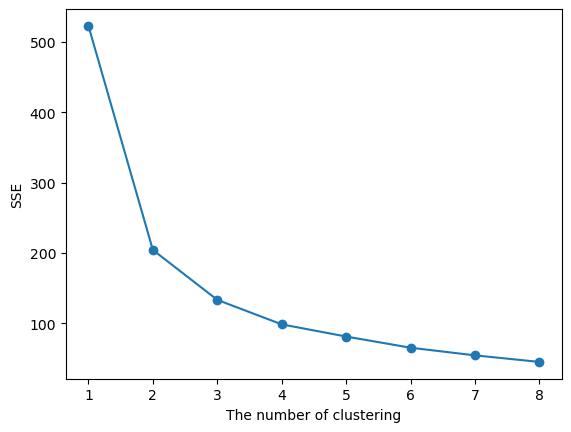

In [137]:
SSE = []  
for k in range(1, 9):
    estimator = KMeans(n_clusters = k).fit(data_np)  
    SSE.append(estimator.inertia_)

X = range(1, 9)
plt.xlabel('The number of clustering')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

使用Silhouette輪廓分析法的話則建議我們使用兩群即可(分數越高代表分得越清楚)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

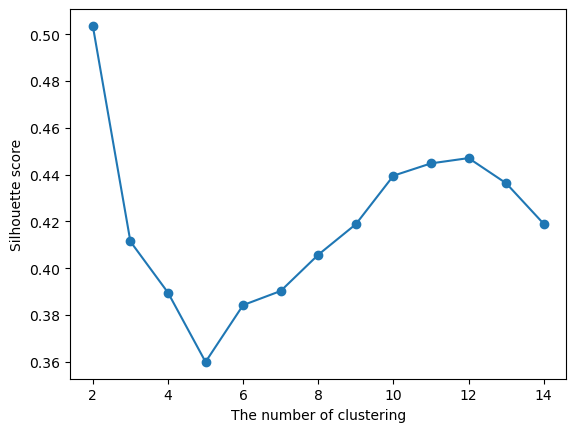

In [138]:
silhouette_avg = []
for j in range(2,15):
    estimator = KMeans(n_clusters = j).fit(data_np)  
    silhouette_avg.append(silhouette_score(data_np,estimator.labels_))

Y = range(2, 15)
plt.xlabel('The number of clustering')
plt.ylabel('Silhouette score')
plt.plot(Y,silhouette_avg , 'o-')
plt.show()

我們決定設定k=3(用SSE判斷下)，並代入KMeans套件協助資料分群

In [139]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data_np)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [140]:
kmeans

KMeans(n_clusters=3, random_state=0)

最後我們就能用散佈圖繪製出在兩屬性分為三群的情況下Kmeans演算法下的分群結果，不同群以不同顏色區分，我們從圖中清楚得知樣本被分為了三群，得到了我們的最後想要的分群結果~

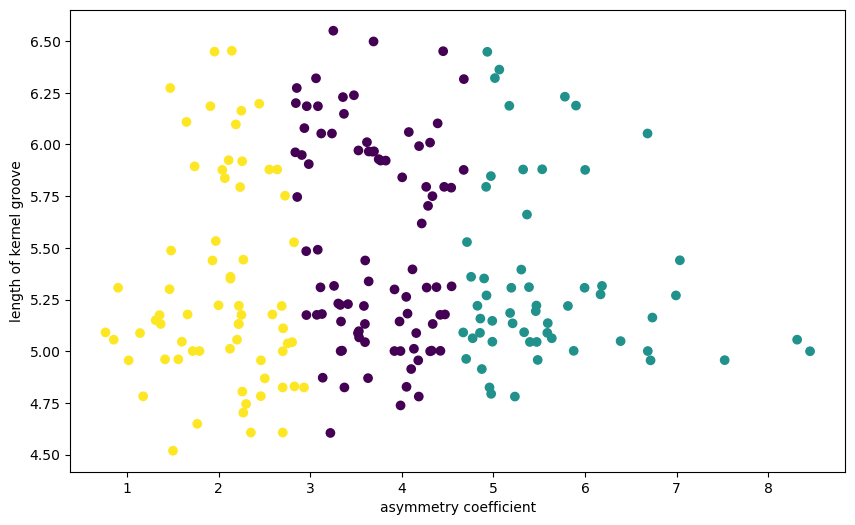

In [141]:
plt.figure(figsize = (10, 6))
plt.xlabel('asymmetry coefficient')
plt.ylabel('length of kernel groove')
plt.scatter(data_np[:,0], data_np[:,1], c = kmeans.labels_)
plt.show()